In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input, Multiply, Activation, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [ ]:
file_path = "/content/whiskey.csv"
df = pd.read_csv(file_path)

print(df.head())

label_encoder = LabelEncoder()
df["whiskey_quality"] = label_encoder.fit_transform(df["whiskey_quality"])

X = df.drop(columns=["whiskey_quality"])
y = df["whiskey_quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

   acidity_level  fruitiness_level  citrus_content  sugar_content  \
0            7.4              0.70            0.00            1.9   
1            7.8              0.88            0.00            2.6   
2            7.8              0.76            0.04            2.3   
3           11.2              0.28            0.56            1.9   
4            7.4              0.70            0.00            1.9   

   chlorine_content  sulfur_dioxide_free  sulfur_dioxide_total  \
0             0.076                 11.0                    34   
1             0.098                 25.0                    67   
2             0.092                 15.0                    54   
3             0.075                 17.0                    60   
4             0.076                 11.0                    34   

   liquid_density  acidity_ph  sulfite_level  alcohol_content whiskey_quality  
0          0.9978        3.51           0.56              9.4     Outstanding  
1          0.9968        3.2

#### **Logistic Regression**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

sample_data = np.array([[8.3,0.655, 0.12,2.3,0.083,15,113,0.9966,3.17,0.66,9.8]])
sample_data = scaler.transform(sample_data)
prediction = model.predict(sample_data)
sample_data1 = np.array([[7.8,0.645,0,2,.082,8,16,0.9964,3.38,0.59,9.8]])
sample_data1 = scaler.transform(sample_data1)
prediction1 = model.predict(sample_data1)

print("Predicted Whiskey Quality:", label_encoder.inverse_transform(prediction)[0])
print("Predicted Whiskey Quality:", label_encoder.inverse_transform(prediction1)[0])


Model Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.60      0.55       102
           1       0.49      0.40      0.44        98

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.50      0.49       200

Predicted Whiskey Quality: Satisfactory
Predicted Whiskey Quality: Outstanding


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### **Random Forest**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

sample_data = np.array([[8.3,0.655, 0.12,2.3,0.083,15,113,0.9966,3.17,0.66,9.8]])
sample_data = scaler.transform(sample_data)
prediction = model.predict(sample_data)
sample_data1 = np.array([[7.8,0.645,0,2,.082,8,16,0.9964,3.38,0.59,9.8]])
sample_data1 = scaler.transform(sample_data1)
prediction1 = model.predict(sample_data1)

print("Predicted Whiskey Quality:", label_encoder.inverse_transform(prediction)[0])
print("Predicted Whiskey Quality:", label_encoder.inverse_transform(prediction1)[0])


Model Accuracy: 0.45
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.48      0.47       102
           1       0.43      0.41      0.42        98

    accuracy                           0.45       200
   macro avg       0.44      0.44      0.44       200
weighted avg       0.44      0.45      0.44       200

Predicted Whiskey Quality: Outstanding
Predicted Whiskey Quality: Outstanding


#### **Neural Network**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

sample_data = np.array([[8.3,0.655, 0.12,2.3,0.083,15,113,0.9966,3.17,0.66,9.8]])
sample_data = scaler.transform(sample_data)
prediction = model.predict(sample_data)

sample_data1 = np.array([[7.8,0.645,0,2,.082,8,16,0.9964,3.38,0.59,9.8]])
sample_data1 = scaler.transform(sample_data1)
prediction1 = model.predict(sample_data1)

print("Predicted Whiskey Quality:", label_encoder.inverse_transform(prediction)[0])
print("Predicted Whiskey Quality:", label_encoder.inverse_transform(prediction1)[0])

Model Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.46      0.47       102
           1       0.47      0.49      0.48        98

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200

Predicted Whiskey Quality: Satisfactory
Predicted Whiskey Quality: Satisfactory


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#### **Tuning Hyperparameters in Random Forest**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (256, 128)],  # Vary number of neurons in layers
    'activation': ['relu', 'tanh', 'logistic'],  # Test different activation functions
    'solver': ['adam', 'sgd', 'lbfgs'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'learning_rate': ['constant', 'adaptive'],  # Learning rate strategy
    'max_iter': [500, 1000, 2000]  # Number of training iterations
}

random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

sample_data = np.array([[7.5, 0.75, 0.1, 2.0, 0.08, 12 , 45, 0.9975, 3.40, 0.6, 9.5]]) #GPT generated
sample_data = scaler.transform(sample_data)
prediction = best_model.predict(sample_data)

sample_data1 = np.array([[7.8,0.645,0,2,0.082,8,16,0.9964,3.38,0.59,9.8]]) # outstanding
sample_data1 = scaler.transform(sample_data1)
prediction1 = model.predict(sample_data1)

print("Predicted Whiskey Quality:", label_encoder.inverse_transform(prediction)[0])
print("Predicted Whiskey Quality:", label_encoder.inverse_transform(prediction1)[0])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'solver': 'sgd', 'max_iter': 2000, 'learning_rate': 'constant', 'hidden_layer_sizes': (64, 32), 'alpha': 0.01, 'activation': 'logistic'}
Optimized Model Accuracy: 0.51
Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       102
           1       0.00      0.00      0.00        98

    accuracy                           0.51       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200

Predicted Whiskey Quality: Outstanding
Predicted Whiskey Quality: Satisfactory


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Comparison of all these 3 model with tuning hyperparameter**

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


🔹 Logistic Regression Accuracy: 0.4950
              precision    recall  f1-score   support

           0       0.50      0.60      0.55       102
           1       0.48      0.39      0.43        98

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



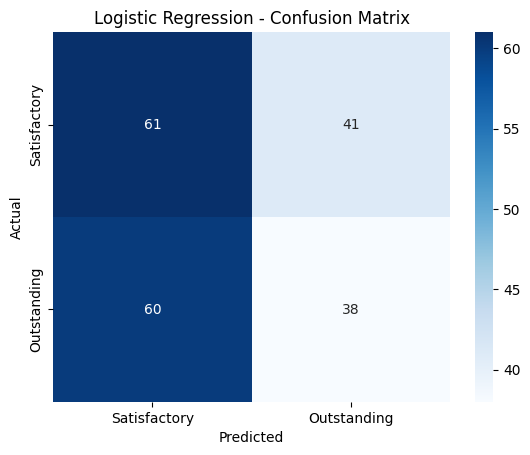


🔹 Random Forest Accuracy: 0.4000
              precision    recall  f1-score   support

           0       0.42      0.43      0.42       102
           1       0.38      0.37      0.38        98

    accuracy                           0.40       200
   macro avg       0.40      0.40      0.40       200
weighted avg       0.40      0.40      0.40       200



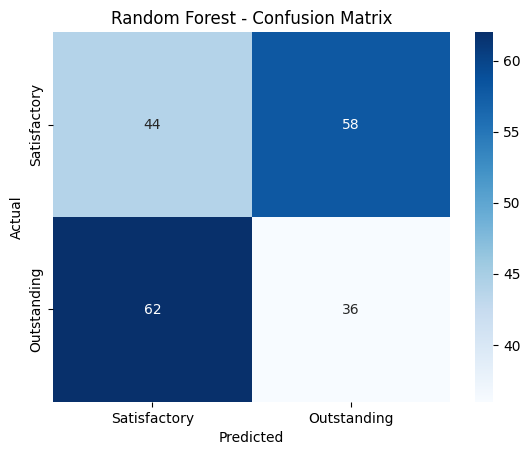


🔹 Neural Network Accuracy: 0.4600
              precision    recall  f1-score   support

           0       0.47      0.48      0.48       102
           1       0.45      0.44      0.44        98

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.46      0.46       200



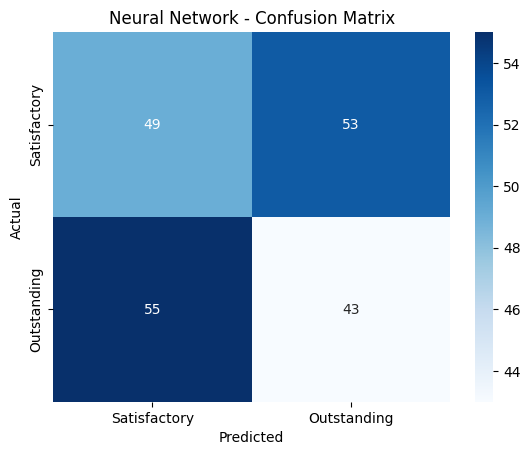


🔹 Sample Prediction Results:
🔹 Logistic Regression: Outstanding
🔹 Random Forest: Satisfactory
🔹 Neural Network: Outstanding


<ipython-input-10-3a27ca0a1e0c>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


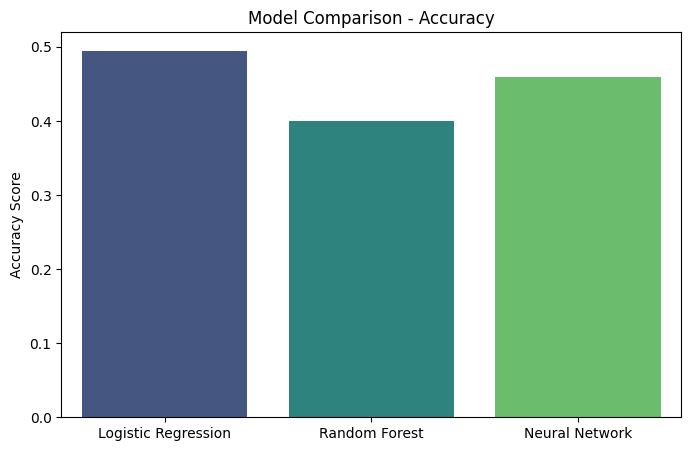

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------- Hyperparameter Tuning ----------------------

# Logistic Regression Hyperparameter Tuning
logreg_params = {"C": [0.1, 1, 10, 50, 100], "solver": ["liblinear", "lbfgs"], "max_iter": [100, 500, 1000]}
logreg = RandomizedSearchCV(LogisticRegression(), logreg_params, n_iter=10, cv=5, random_state=42)
logreg.fit(X_train, y_train)

# Random Forest Hyperparameter Tuning
rf_params = {"n_estimators": [100, 200, 300], "max_depth": [5, 10, 20], "min_samples_split": [2, 5, 10]}
rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=10, cv=5, random_state=42)
rf.fit(X_train, y_train)

# Neural Network (MLP) Hyperparameter Tuning
mlp_params = {
    "hidden_layer_sizes": [(64, 32), (128, 64), (128, 128)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "sgd"],
    "max_iter": [500, 1000],
}
mlp = RandomizedSearchCV(MLPClassifier(random_state=42), mlp_params, n_iter=10, cv=5, random_state=42)
mlp.fit(X_train, y_train)

best_logreg = logreg.best_estimator_
best_rf = rf.best_estimator_
best_mlp = mlp.best_estimator_

# ---------------------- Model Evaluation ----------------------
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n🔹 {model_name} Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Satisfactory", "Outstanding"], yticklabels=["Satisfactory", "Outstanding"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

y_pred_logreg = best_logreg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_mlp = best_mlp.predict(X_test)

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_mlp, "Neural Network")

# ---------------------- Sample Prediction ----------------------
sample_data = np.array([[8.3,0.655, 0.12,2.3,0.083,15,113,0.9966,3.17,0.66,9.8]])
sample_data = scaler.transform(sample_data)

pred_logreg = best_logreg.predict(sample_data)
pred_rf = best_rf.predict(sample_data)
pred_mlp = best_mlp.predict(sample_data)

quality_map = {0: "Satisfactory", 1: "Outstanding"}

print("\n🔹 Sample Prediction Results:")
print(f"🔹 Logistic Regression: {quality_map[pred_logreg[0]]}")
print(f"🔹 Random Forest: {quality_map[pred_rf[0]]}")
print(f"🔹 Neural Network: {quality_map[pred_mlp[0]]}")

# ---------------------- Model Comparison ----------------------
models = ["Logistic Regression", "Random Forest", "Neural Network"]
accuracies = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_mlp)]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.show()


#### XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:06:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 XGBoost Accuracy: 0.4750
              precision    recall  f1-score   support

           0       0.49      0.57      0.52       102
           1       0.46      0.38      0.41        98

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200



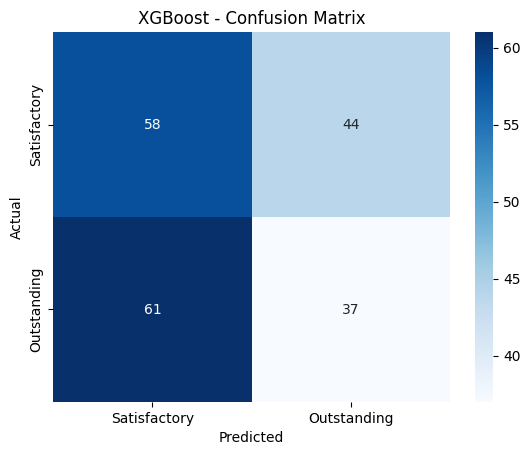

🔹 XGBoost Prediction: Satisfactory


<ipython-input-11-10bb792a397c>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


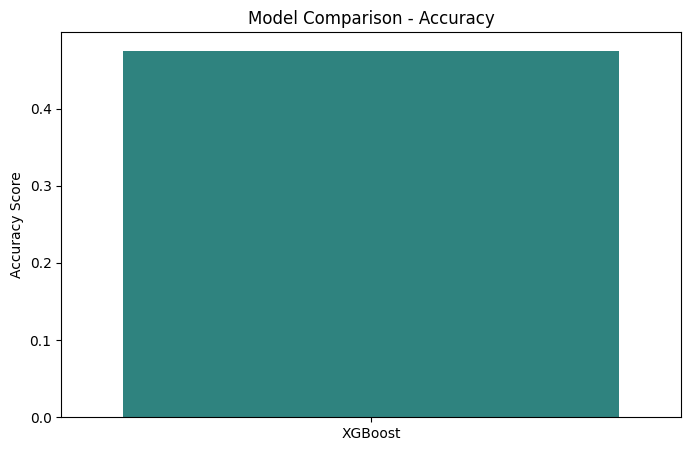

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

# ---------------------- XGBoost Hyperparameter Tuning ----------------------
xgb_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2],
}

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n🔹 {model_name} Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Satisfactory", "Outstanding"], yticklabels=["Satisfactory", "Outstanding"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_tuned = RandomizedSearchCV(xgb_model, xgb_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
xgb_tuned.fit(X_train, y_train)

# Get best model
best_xgb = xgb_tuned.best_estimator_

# ---------------------- XGBoost Evaluation ----------------------
y_pred_xgb = best_xgb.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# ---------------------- Sample Prediction ----------------------
sample_data = np.array([[8.3,0.655, 0.12,2.3,0.083,15,113,0.9966,3.17,0.66,9.8]])
sample_data = scaler.transform(sample_data)

pred_xgb = best_xgb.predict(sample_data)

quality_map = {0: "Satisfactory", 1: "Outstanding"}
print(f"🔹 XGBoost Prediction: {quality_map[pred_xgb[0]]}")

# ---------------------- Model Comparison ----------------------
models = ["XGBoost"]
accuracies = [
    # accuracy_score(y_test, y_pred_logreg),
    # accuracy_score(y_test, y_pred_rf),
    # accuracy_score(y_test, y_pred_mlp),
    accuracy_score(y_test, y_pred_xgb),
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.show()


#### **Stacked Model [XGBoost + AdaBoost + Random Forest]**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:06:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:06:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:06:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-12-cee175b13b18>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


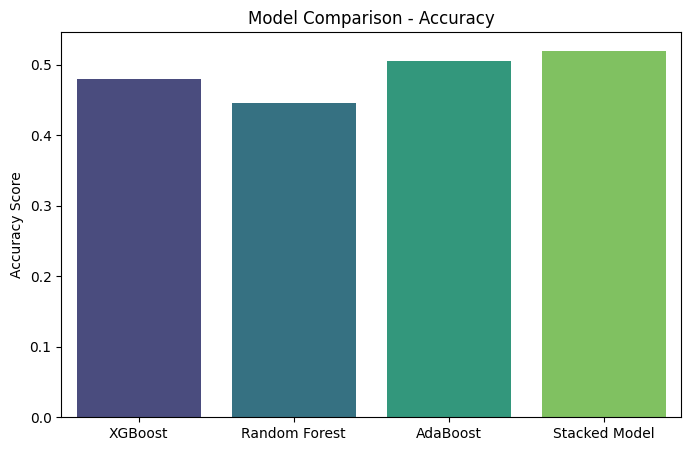

🔹 XGBoost Accuracy: 0.4800
🔹 Random Forest Accuracy: 0.4450
🔹 AdaBoost Accuracy: 0.5050
🚀 Stacked Model Accuracy: 0.5200


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------- Base Models ----------------------
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
adaboost_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

# ---------------------- Stacking Classifier ----------------------
stacked_model = StackingClassifier(
    estimators=[
        ("xgb", xgb_model),
        ("rf", rf_model),
        ("adaboost", adaboost_model),
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# ---------------------- Model Evaluation ----------------------
y_pred_stack = stacked_model.predict(X_test)
stacked_accuracy = accuracy_score(y_test, y_pred_stack)

# Individual Model Accuracies
y_pred_xgb = xgb_model.fit(X_train, y_train).predict(X_test)
y_pred_rf = rf_model.fit(X_train, y_train).predict(X_test)
y_pred_adaboost = adaboost_model.fit(X_train, y_train).predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

# ---------------------- Compare Accuracies ----------------------
models = ["XGBoost", "Random Forest", "AdaBoost", "Stacked Model"]
accuracies = [accuracy_xgb, accuracy_rf, accuracy_adaboost, stacked_accuracy]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.show()

print(f"🔹 XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"🔹 Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"🔹 AdaBoost Accuracy: {accuracy_adaboost:.4f}")
print(f"🚀 Stacked Model Accuracy: {stacked_accuracy:.4f}")


#### **Neural Networks as a Meta-Model for Stacking**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:06:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:06:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:06:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-13-24090455e47a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


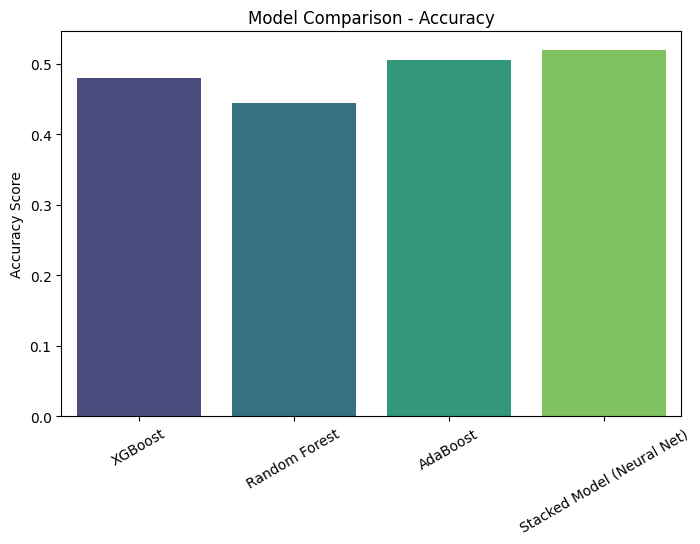

🔹 XGBoost Accuracy: 0.4800
🔹 Random Forest Accuracy: 0.4450
🔹 AdaBoost Accuracy: 0.5050
🚀 Stacked Model (Neural Net) Accuracy: 0.5200


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------- Base Models ----------------------
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
adaboost_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

# ---------------------- Stacking Classifier with Neural Network ----------------------
mlp_meta_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

stacked_model_nn = StackingClassifier(
    estimators=[
        ("xgb", xgb_model),
        ("rf", rf_model),
        ("adaboost", adaboost_model),
    ],
    final_estimator=mlp_meta_model,
    cv=5
)

# Train the stacked model
stacked_model_nn.fit(X_train, y_train)

# ---------------------- Model Evaluation ----------------------
y_pred_stack_nn = stacked_model_nn.predict(X_test)
stacked_nn_accuracy = accuracy_score(y_test, y_pred_stack_nn)

# Individual Model Accuracies
y_pred_xgb = xgb_model.fit(X_train, y_train).predict(X_test)
y_pred_rf = rf_model.fit(X_train, y_train).predict(X_test)
y_pred_adaboost = adaboost_model.fit(X_train, y_train).predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

# ---------------------- Compare Accuracies ----------------------
models = ["XGBoost", "Random Forest", "AdaBoost", "Stacked Model (Neural Net)"]
accuracies = [accuracy_xgb, accuracy_rf, accuracy_adaboost, stacked_nn_accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=30)
plt.show()

print(f"🔹 XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"🔹 Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"🔹 AdaBoost Accuracy: {accuracy_adaboost:.4f}")
print(f"🚀 Stacked Model (Neural Net) Accuracy: {stacked_nn_accuracy:.4f}")


#### **Stacking with LSTM**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# ---------------------- Base Models ----------------------
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
adaboost_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

# Train models
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
adaboost_model.fit(X_train, y_train)

# ---------------------- Get Predictions for LSTM ----------------------
xgb_preds = xgb_model.predict_proba(X_train)
rf_preds = rf_model.predict_proba(X_train)
adaboost_preds = adaboost_model.predict_proba(X_train)

xgb_preds_test = xgb_model.predict_proba(X_test)
rf_preds_test = rf_model.predict_proba(X_test)
adaboost_preds_test = adaboost_model.predict_proba(X_test)

# Stack predictions as input for LSTM
X_train_stack = np.hstack((xgb_preds, rf_preds, adaboost_preds))
X_test_stack = np.hstack((xgb_preds_test, rf_preds_test, adaboost_preds_test))

# Reshape for LSTM (samples, timesteps, features)
X_train_stack = X_train_stack.reshape((X_train_stack.shape[0], 1, X_train_stack.shape[1]))
X_test_stack = X_test_stack.reshape((X_test_stack.shape[0], 1, X_test_stack.shape[1]))

# ---------------------- Build LSTM Meta-Model ----------------------
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train_stack.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train LSTM
lstm_model.fit(X_train_stack, y_train, epochs=50, batch_size=16, validation_data=(X_test_stack, y_test), verbose=1)

# ---------------------- Evaluate LSTM Stacked Model ----------------------
y_pred_lstm = np.argmax(lstm_model.predict(X_test_stack), axis=1)
stacked_lstm_accuracy = accuracy_score(y_test, y_pred_lstm)

# ---------------------- Compare Accuracies ----------------------
accuracy_xgb = accuracy_score(y_test, xgb_model.predict(X_test))
accuracy_rf = accuracy_score(y_test, rf_model.predict(X_test))
accuracy_adaboost = accuracy_score(y_test, adaboost_model.predict(X_test))

models = ["XGBoost", "Random Forest", "AdaBoost", "Stacked Model (LSTM)"]
accuracies = [accuracy_xgb, accuracy_rf, accuracy_adaboost, stacked_lstm_accuracy]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=30)
plt.show()

print(f"🔹 XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"🔹 Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"🔹 AdaBoost Accuracy: {accuracy_adaboost:.4f}")
print(f"🚀 Stacked Model (LSTM) Accuracy: {stacked_lstm_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:06:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NotFoundError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-14-d1f5df8cc9cc>", line 49, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

could not find registered transfer manager for platform Host -- check target linkage
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_3634]

#### **LSTM**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Reshape input for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Add time step dimension
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# ---------------------- Build LSTM Model ----------------------
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=False, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ---------------------- Train the Model ----------------------
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# ---------------------- Evaluate LSTM Model ----------------------
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)
lstm_accuracy = accuracy_score(y_test, y_pred_lstm)

print(f"🚀 LSTM Model Accuracy: {lstm_accuracy:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NotFoundError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-15-048b7ebe8e5c>", line 25, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

could not find registered transfer manager for platform Host -- check target linkage
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_5967]

##### **Increased LSTM units, dropout, or training epochs and apply early stopping**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "/content/whiskey.csv"
df = pd.read_csv(file_path)

# Encode target variable
label_encoder = LabelEncoder()
df["whiskey_quality"] = label_encoder.fit_transform(df["whiskey_quality"])

# Split features and target
X = df.drop(columns=["whiskey_quality"])
y = df["whiskey_quality"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features BEFORE reshaping
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Now it's 2D (samples, features)
X_test_scaled = scaler.transform(X_test)

# ---------------------- Train Logistic Regression ----------------------
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_acc = accuracy_score(y_test, logreg.predict(X_test_scaled))
print(f"📊 Logistic Regression Accuracy: {logreg_acc:.4f}")

# ---------------------- Train Random Forest ----------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test_scaled))
print(f"🌲 Random Forest Accuracy: {rf_acc:.4f}")

# ---------------------- Train Neural Network (MLP) ----------------------
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=200)
mlp.fit(X_train_scaled, y_train)
mlp_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
print(f"🧠 Neural Network (MLP) Accuracy: {mlp_acc:.4f}")

# ---------------------- Sample Prediction ----------------------
sample_data = np.array([[8.3, 0.655, 0.12, 2.3, 0.083, 15, 113, 0.9966, 3.17, 0.66, 9.8]])
sample_data_scaled = scaler.transform(sample_data)

pred_logreg = logreg.predict(sample_data_scaled)
pred_rf = rf.predict(sample_data_scaled)
pred_mlp = mlp.predict(sample_data_scaled)

quality_map = {0: "Satisfactory", 1: "Outstanding"}

print("\n🔹 Sample Prediction Results:")
print(f"🔹 Logistic Regression: {quality_map[pred_logreg[0]]}")
print(f"🔹 Random Forest: {quality_map[pred_rf[0]]}")
print(f"🔹 Neural Network: {quality_map[pred_mlp[0]]}")


#### **Naive Bayes**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------- Train Logistic Regression ----------------------
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
print(f"📊 Logistic Regression Accuracy: {logreg_acc:.4f}")

# ---------------------- Train Random Forest ----------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"🌲 Random Forest Accuracy: {rf_acc:.4f}")

# ---------------------- Train Neural Network (MLP) ----------------------
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=200)
mlp.fit(X_train, y_train)
mlp_acc = accuracy_score(y_test, mlp.predict(X_test))
print(f"🧠 Neural Network (MLP) Accuracy: {mlp_acc:.4f}")

# ---------------------- Train Naïve Bayes ----------------------
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb.predict(X_test))
print(f"🎲 Naïve Bayes Accuracy: {nb_acc:.4f}")

# ---------------------- Sample Prediction ----------------------
sample_data = np.array([[8.3, 0.655, 0.12, 2.3, 0.083, 15, 113, 0.9966, 3.17, 0.66, 9.8]])
sample_data = scaler.transform(sample_data)

pred_logreg = logreg.predict(sample_data)
pred_rf = rf.predict(sample_data)
pred_mlp = mlp.predict(sample_data)
pred_nb = nb.predict(sample_data)

quality_map = {0: "Satisfactory", 1: "Outstanding"}

print("\n🔹 Sample Prediction Results:")
print(f"📊 Logistic Regression: {quality_map[pred_logreg[0]]}")
print(f"🌲 Random Forest: {quality_map[pred_rf[0]]}")
print(f"🧠 Neural Network: {quality_map[pred_mlp[0]]}")
print(f"🎲 Naïve Bayes: {quality_map[pred_nb[0]]}")


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------- Train Naïve Bayes Model ----------------------
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test data
y_pred = nb.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Naïve Bayes Accuracy: {accuracy:.2f}")
print("📜 Classification Report:\n", classification_report(y_test, y_pred))

# ---------------------- Sample Prediction ----------------------
sample_data = np.array([[8.3, 0.655, 0.12, 2.3, 0.083, 15, 113, 0.9966, 3.17, 0.66, 9.8]])
sample_data = scaler.transform(sample_data)
prediction = nb.predict(sample_data)

sample_data1 = np.array([[7.8, 0.645, 0, 2, 0.082, 8, 16, 0.9964, 3.38, 0.59, 9.8]])
sample_data1 = scaler.transform(sample_data1)
prediction1 = nb.predict(sample_data1)

print("🥃 Predicted Whiskey Quality (Sample 1):", label_encoder.inverse_transform(prediction)[0])
print("🥃 Predicted Whiskey Quality (Sample 2):", label_encoder.inverse_transform(prediction1)[0])


#### BiLSTM

In [ ]:


# ✅ Standardize features BEFORE reshaping
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Now it's 2D (samples, features)
X_test_scaled = scaler.transform(X_test)

# ✅ Reshape for BiLSTM (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# ---------------------- Build BiLSTM Model ----------------------
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.2)),  # First BiLSTM Layer
    Bidirectional(LSTM(64, dropout=0.2)),  # Second BiLSTM Layer
    Dense(32, activation='relu'),  # Fully Connected Layer
    Dropout(0.2),  # Regularization
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ---------------------- Train Model ----------------------
history = model.fit(X_train_reshaped, y_train,
                    epochs=100, batch_size=16,
                    validation_data=(X_test_reshaped, y_test),
                    callbacks=[early_stopping], verbose=1)

# ---------------------- Evaluate Model ----------------------
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 BiLSTM Model Accuracy: {accuracy:.4f}")
print("📜 Classification Report:\n", classification_report(y_test, y_pred))

# ---------------------- Plot Training History ----------------------
plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.show()

# ---------------------- Sample Prediction ----------------------
def predict_quality(sample):
    sample_scaled = scaler.transform(np.array([sample]))  # Scale the input
    sample_reshaped = sample_scaled.reshape(1, 1, -1)  # Reshape for LSTM
    prediction = (model.predict(sample_reshaped) > 0.5).astype("int32")
    return label_encoder.inverse_transform(prediction)[0]

sample_data1 = [8.3, 0.655, 0.12, 2.3, 0.083, 15, 113, 0.9966, 3.17, 0.66, 9.8]
sample_data2 = [7.8, 0.645, 0, 2, 0.082, 8, 16, 0.9964, 3.38, 0.59, 9.8]

print("🥃 Predicted Whiskey Quality (Sample 1):", predict_quality(sample_data1))
print("🥃 Predicted Whiskey Quality (Sample 2):", predict_quality(sample_data2))


In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.2/540.2 kB 10.9 MB/s eta 0:00:00


#### **SHAP**

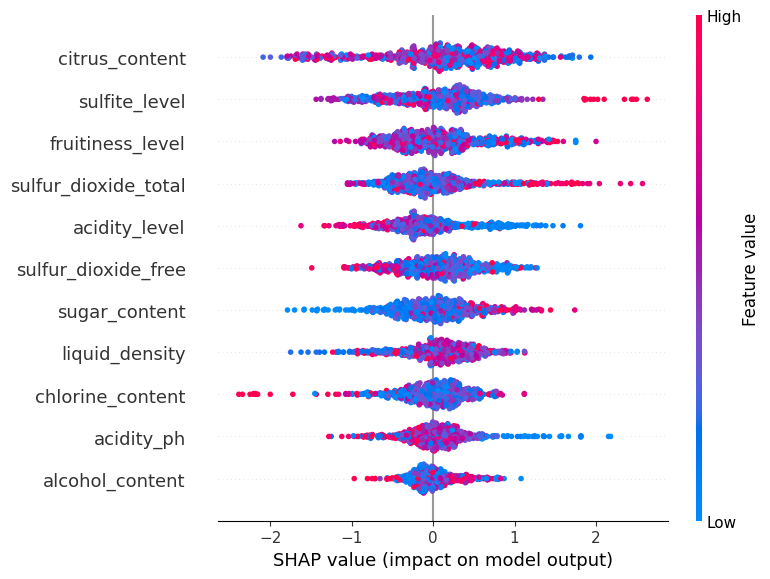

In [ ]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
file_path = "whiskey.csv"
df = pd.read_csv(file_path)

# Encode target variable
label_encoder = LabelEncoder()
df["whiskey_quality"] = label_encoder.fit_transform(df["whiskey_quality"])

# Split features and target
X = df.drop(columns=["whiskey_quality"])
y = df["whiskey_quality"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Explain model predictions using SHAP
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

# Plot feature importance
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_train, feature_names=X.columns)
plt.show()


#### **XGBoost + BiLSTM + Attention**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, Dropout, Dot, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
file_path = "whiskey.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Encode target variable
label_encoder = LabelEncoder()
df["whiskey_quality"] = label_encoder.fit_transform(df["whiskey_quality"])

# Split features and target
X = df.drop(columns=["whiskey_quality"])
y = df["whiskey_quality"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost for feature extraction
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Extract transformed features
X_train_xgb = xgb_model.predict_proba(X_train_scaled)
X_test_xgb = xgb_model.predict_proba(X_test_scaled)

# Reshape for BiLSTM (samples, time steps, features)
X_train_seq = X_train_xgb.reshape(X_train_xgb.shape[0], 1, X_train_xgb.shape[1])
X_test_seq = X_test_xgb.reshape(X_test_xgb.shape[0], 1, X_test_xgb.shape[1])

# BiLSTM Model with Dot-Product Attention
input_layer = Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
bi_lstm = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2))(input_layer)

# Attention Mechanism
attention_scores = Dense(1, activation="tanh")(bi_lstm)  # Compute attention scores
attention_scores = Activation("softmax")(attention_scores)  # Normalize scores
attention_output = Dot(axes=1)([attention_scores, bi_lstm])  # Weighted sum

dense = Dense(32, activation='relu')(attention_output)
dropout = Dropout(0.2)(dense)
output_layer = Dense(1, activation='sigmoid')(dropout)

# Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train Model
history = model.fit(X_train_seq, y_train, epochs=100, batch_size=16, validation_data=(X_test_seq, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate Model
y_pred = (model.predict(X_test_seq) > 0.5).astype("int32").flatten()  # Flatten to match shape
y_test = y_test.astype("int32")  # Ensure consistent dtype

accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 XGBoost + BiLSTM + Attention Model Accuracy: {accuracy:.4f}")
print("📜 Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (16, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


NotFoundError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-22-ae517e5a55cd>", line 66, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

could not find registered transfer manager for platform Host -- check target linkage
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_14449]

##### **RFE**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------- Feature Selection using RFE ----------------------

xgb = XGBClassifier()
rfe = RFE(xgb, n_features_to_select=6)  # Select best 6 features
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)

# Reshape input for BiLSTM
X_train_seq = X_train_selected.reshape(X_train_selected.shape[0], 1, X_train_selected.shape[1])
X_test_seq = X_test_selected.reshape(X_test_selected.shape[0], 1, X_test_selected.shape[1])

# ---------------------- Custom Attention Layer ----------------------

def attention_layer(inputs):
    """
    Implements Attention Mechanism.
    """
    attention = Dense(1, activation="tanh")(inputs)  # Score function
    attention = Activation("softmax")(attention)  # Softmax to normalize
    attention = Multiply()([inputs, attention])  # Apply attention scores
    attention = Lambda(lambda x: K.sum(x, axis=1))(attention)  # Summing over time steps
    return attention

# ---------------------- Build BiLSTM Model with Attention ----------------------

def build_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2))(inputs)
    x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2))(x)

    attn_output = attention_layer(x)  # Apply Attention Layer

    x = Dense(32, activation='relu')(attn_output)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model((1, X_train_selected.shape[1]))

# ---------------------- Train Model ----------------------

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train_seq, y_train, epochs=100, batch_size=16, validation_data=(X_test_seq, y_test), callbacks=[early_stopping], verbose=1)

# ---------------------- Evaluate Model ----------------------

y_pred = (model.predict(X_test_seq) > 0.5).astype("int32").flatten()
y_test = y_test.astype("int32")
accuracy = accuracy_score(y_test, y_pred)

print(f"🔥 XGBoost + BiLSTM + Attention Model Accuracy: {accuracy:.4f}")
print("📜 Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (16, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


NotFoundError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-23-cf14f08b2a1c>", line 50, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

could not find registered transfer manager for platform Host -- check target linkage
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_21567]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Attention
from tensorflow.keras.optimizers import Adam

# Load dataset (Replace 'data.csv' with your actual dataset file)
df = pd.read_csv("whiskey.csv")

# Encode categorical target variable
label_encoder = LabelEncoder()
df['whiskey_quality'] = label_encoder.fit_transform(df['whiskey_quality'])

# Features and target
X = df.drop(columns=['whiskey_quality'])
y = df['whiskey_quality']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train XGBoost for feature extraction
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Get feature importance-based transformed data
X_train_xgb = xgb_model.apply(X_train)
X_test_xgb = xgb_model.apply(X_test)

# Reshape for LSTM (required 3D input)
X_train_lstm = X_train_xgb.reshape((X_train_xgb.shape[0], X_train_xgb.shape[1], 1))
X_test_lstm = X_test_xgb.reshape((X_test_xgb.shape[0], X_test_xgb.shape[1], 1))

# Define BiLSTM with Attention model
def attention_layer(inputs):
    attention = Dense(1, activation='tanh')(inputs)
    attention = tf.nn.softmax(attention, axis=1)
    output = tf.reduce_sum(inputs * attention, axis=1)
    return output

input_layer = Input(shape=(X_train_lstm.shape[1], 1))
bilstm = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
attention_output = attention_layer(bilstm)
output_layer = Dense(1, activation='sigmoid')(attention_output)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=16, validation_data=(X_test_lstm, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
